In [95]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
import seaborn as sns
import pandas as pd
import os

from folder_paths import *

### Load fit parameters and scan infos

In [ ]:
### LOAD FIT OUT ###

# get file names

g2_fit_files = os.listdir(g2fit_folder)
g2_fit_files.sort()
g2_fit_files = [f for f in g2_fit_files if f.startswith('g2fit_')]

# LOAD g2fit DATA
g2_fit = pd.DataFrame()
for f in g2_fit_files:
    df = pd.read_csv(os.path.join(g2fit_folder, f), comment='#')                                            # load data
    scan_number = f.split('_')[1] + '_' + f.split('_')[2] + '_' + f.split('_')[3] + '_' + f.split('_')[4]   # get scan number from file name (ex: g2fit_Ta2O5_2.5um_0002_0004_Q=2.0_dq=0.01 -> Ta2O5_2.5um_0002_0004)
    df.index = [scan_number] * len(df)                                                                      # add scan number as index
    g2_fit = pd.concat([g2_fit, df], axis=0)                                                                # append to g2_fit dataframe

g2_fit.index.name = 'scan'  # set index name to 'scan'

# LOAD linear g2 data
g2_files = os.listdir(g2_folder)

f
#display(g2_fit)

### Cfr. between sample mounted towards beam (Ta2O5_2.5um dataset 2 scan 4) and rotated by 180 deg (Ta2O5_2.5um dataset 3 scan 9)

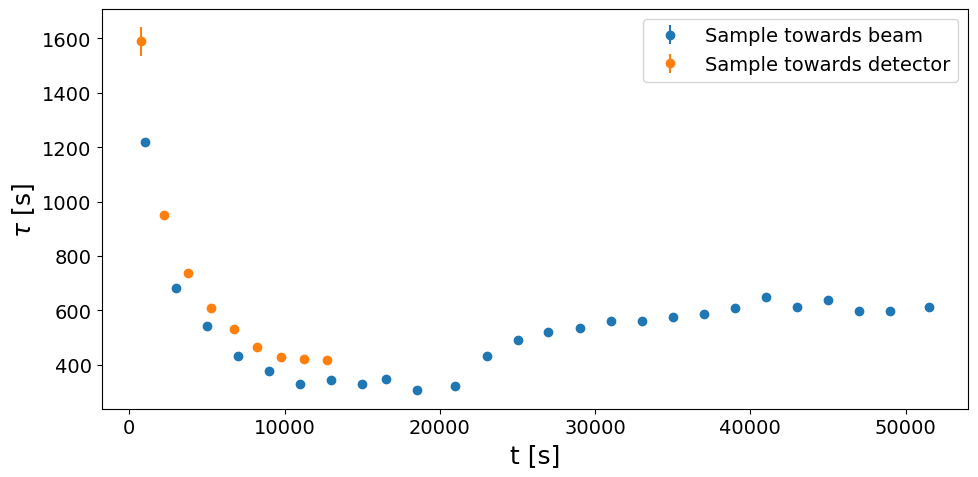

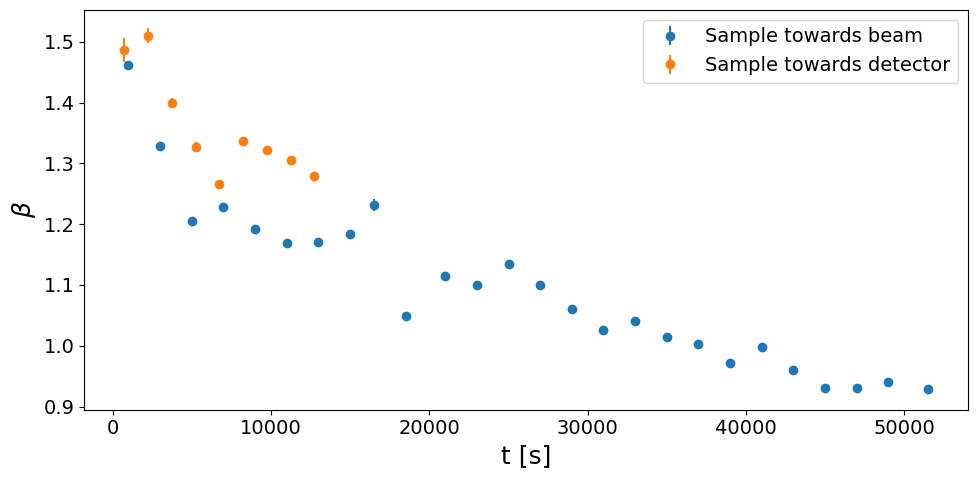

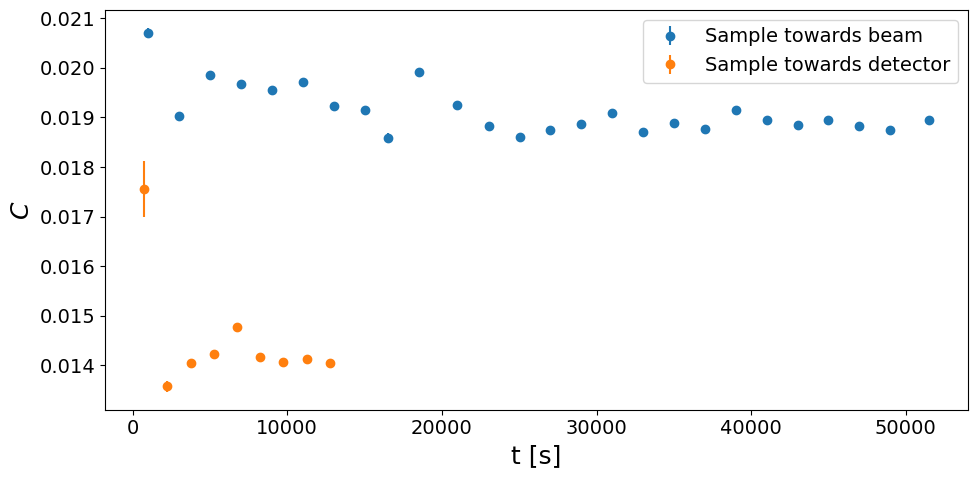

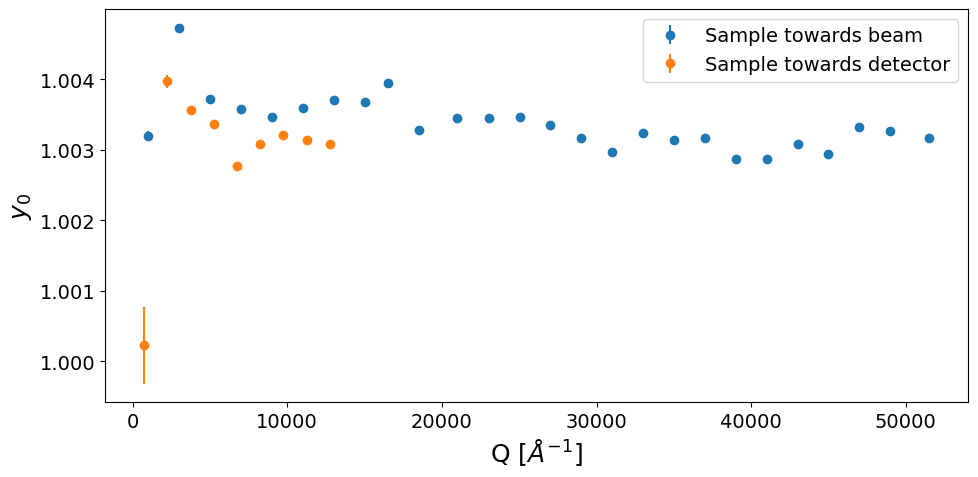

In [128]:
#################################################
idx_1 = 'Ta2O5_2.5um_0002_0004'
idx_2 = 'Ta2O5_2.5um_0003_0009'
#################################################


# tau
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(g2_fit.loc[idx_1]['t'], g2_fit.loc[idx_1]['tau'], yerr=g2_fit.loc[idx_1]['dtau'], fmt='o',label = 'Sample towards beam')
ax.errorbar(g2_fit.loc[idx_2]['t'], g2_fit.loc[idx_2]['tau'], yerr=g2_fit.loc[idx_2]['dtau'], fmt='o', label = 'Sample towards detector')
##plt.yscale('log')
plt.xlabel(r't [s]')
plt.ylabel(r'$\tau$ [s]')
plt.legend()
plt.tight_layout(), plt.show();

# beta
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(g2_fit.loc[idx_1]['t'], g2_fit.loc[idx_1]['beta'], yerr=g2_fit.loc[idx_1]['dbeta'], fmt='o', label = 'Sample towards beam')
ax.errorbar(g2_fit.loc[idx_2]['t'], g2_fit.loc[idx_2]['beta'], yerr=g2_fit.loc[idx_2]['dbeta'], fmt='o', label = 'Sample towards detector')
#plt.xscale('log')
plt.xlabel(r't [s]')
plt.ylabel(r'$\beta$')
plt.legend()
plt.tight_layout(), plt.show();

# C
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(g2_fit.loc[idx_1]['t'], g2_fit.loc[idx_1]['c'], yerr=g2_fit.loc[idx_1]['dc'], fmt='o', label = 'Sample towards beam')
ax.errorbar(g2_fit.loc[idx_2]['t'], g2_fit.loc[idx_2]['c'], yerr=g2_fit.loc[idx_2]['dc'], fmt='o', label = 'Sample towards detector')
#plt.yscale('log')
plt.xlabel(r't [s]')
plt.ylabel(r'$C$')
plt.legend()
plt.tight_layout(), plt.show();

# y0
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(g2_fit.loc[idx_1]['t'], g2_fit.loc[idx_1]['y0'], yerr=g2_fit.loc[idx_1]['dy0'], fmt='o', label = 'Sample towards beam')
ax.errorbar(g2_fit.loc[idx_2]['t'], g2_fit.loc[idx_2]['y0'], yerr=g2_fit.loc[idx_2]['dy0'], fmt='o', label = 'Sample towards detector')
#plt.yscale('log')
plt.xlabel(r'Q [$\AA^{-1}$]')
plt.ylabel(r'$y_0$')
plt.legend()
plt.tight_layout(), plt.show();



## g2 comparison

In [125]:
################################
sample_name = 'Ta2O5_2.5um'
Ndataset = 2
Nscan = 4
Q=2.0
dq=0.01
##############################

t_g2_beam = np.load(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq)+'.npz', allow_pickle=True)['t_g2']
g2_beam = np.load(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq)+'.npz', allow_pickle=True)['g2']

keys_beam = list(t_g2_beam.item().keys())

In [48]:
#######################################
sample_name = 'Ta2O5_2.5um'
Ndataset = 3
Nscan = 9
Q=2.0
dq=0.01
#######################################

t_g2_det = np.load(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq)+'.npz', allow_pickle=True)['t_g2']
g2_det = np.load(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq)+'.npz', allow_pickle=True)['g2']

keys_det = list(t_g2_det.item().keys())

In [46]:
first_key = keys_det[0]
t_g2_det.item()[first_key]

array([1.10000e-01, 2.20000e-01, 3.30000e-01, ..., 1.49963e+03,
       1.49974e+03, 1.49985e+03], shape=(13635,))

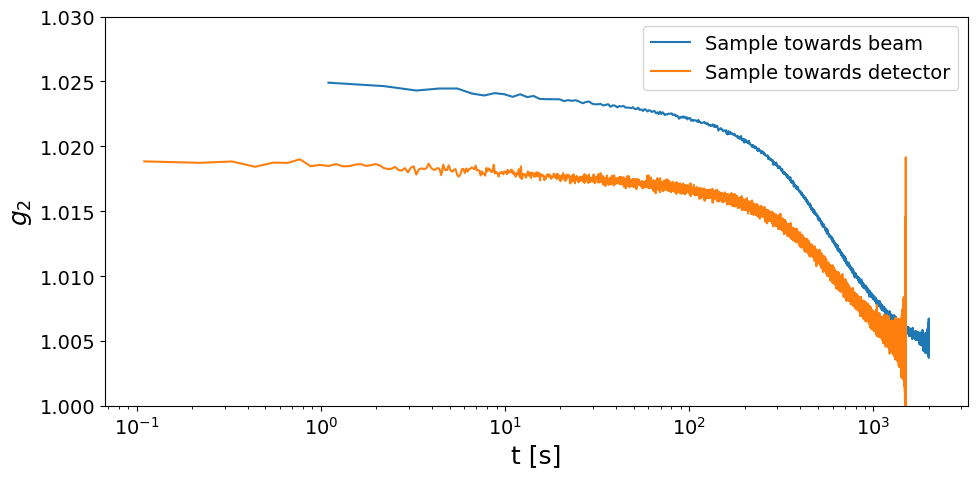

In [60]:
#########################
idx_beam = 1
idx_det = 2
#########################


plt.figure(figsize=(10,5))
plt.plot(t_g2_beam.item()[keys_beam[idx_beam]], g2_beam.item()[keys_beam[idx_beam]], label='Sample towards beam')
plt.plot(t_g2_det.item()[keys_det[idx_det]], g2_det.item()[keys_det[idx_det]], label='Sample towards detector')
plt.xlabel(r't [s]')
plt.ylabel(r'$g_2$')
plt.legend()
plt.xscale('log')
plt.ylim(1.0,1.03)
plt.tight_layout(), plt.show();

In [61]:
g2_fit.loc[idx_2]['y0']

26    1.000222
27    1.003970
28    1.003568
29    1.003359
30    1.002763
31    1.003084
32    1.003203
33    1.003138
34    1.003082
Name: y0, dtype: float64

In [62]:
y0_beam = g2_fit.loc[idx_1]['y0'][1]
y0_det = g2_fit.loc[idx_2]['y0'][28]

c_beam = g2_fit.loc[idx_1]['c'][1]
c_det = g2_fit.loc[idx_2]['c'][28]

g2_beam_norm = (g2_beam.item()[keys_beam[idx_beam]] -y0_beam)/c_beam 
g2_det_norm = (g2_det.item()[keys_det[idx_det]] -y0_det)/c_det

In [73]:
def decorrelation_f(t, tau, beta, c, y0):
    '''
    Decorrelation function for XPCS analysis.

    Parameters
    ----------
        t : array_like
            Time variable.
        tau : float
            Characteristic decay time.
        beta : float
            Stretching exponent.
        c : float
            Contrast or amplitude.
        y0 : float
            Baseline offset.
    Returns
    -------
    array_like
        Decorrelation function evaluated at t.
    '''
    return c * np.exp(-(t / tau) ** beta) + y0

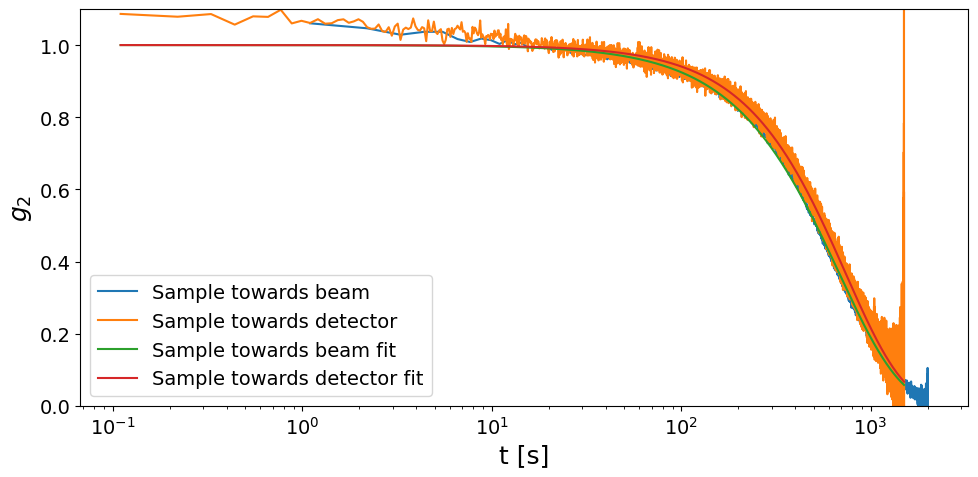

In [93]:
plt.figure(figsize=(10,5))
plt.plot(t_g2_beam.item()[keys_beam[idx_beam]], g2_beam_norm, label='Sample towards beam')
plt.plot(t_g2_det.item()[keys_det[idx_det]], g2_det_norm, label='Sample towards detector')

x = np.arange(np.min(t_g2_det.item()[keys_det[idx_det]]), np.max(t_g2_det.item()[keys_det[idx_det]]), 1e-2)
y_1 = decorrelation_f(x, *(g2_fit.loc[idx_1]['tau'][1], g2_fit.loc[idx_1]['beta'][1], 1, 0))
y_2 = decorrelation_f(x, *(g2_fit.loc[idx_2]['tau'][28], g2_fit.loc[idx_2]['beta'][28], 1, 0))

plt.plot(x, y_1, label='Sample towards beam fit')
plt.plot(x, y_2, label='Sample towards detector fit')

plt.xlabel(r't [s]')
plt.ylabel(r'$g_2$')
plt.legend()
plt.xscale('log')
plt.ylim(0,1.1)
plt.tight_layout(), plt.show();